# $\color{red}{\text{Farbod Siahkali - 810198510}}$

# $\color{green}{\text{Data Loading}}$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from warnings import simplefilter
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [2]:
# load the dataset
df = pd.read_csv('/content/house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.2   21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   Unnamed: 0     21613 non-null  int64  
 3   id             21613 non-null  int64  
 4   date           21613 non-null  object 
 5   price          21613 non-null  float64
 6   bedrooms       21613 non-null  int64  
 7   bathrooms      21613 non-null  float64
 8   sqft_living    18528 non-null  float64
 9   sqft_lot       21613 non-null  int64  
 10  floors         18530 non-null  float64
 11  waterfront     21613 non-null  int64  
 12  view           21613 non-null  int64  
 13  condition      21613 non-null  int64  
 14  grade          21613 non-null  int64  
 15  sqft_above     21613 non-null  int64  
 16  sqft_basement  21184 non-null  float64
 17  yr_built       18531 non-null  float64
 18  yr_ren

In [4]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,...,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,...,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,...,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,...,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


In [5]:
# get the number of missing values for each feature
null_counts = df.isnull().sum()

# calculate the ratio of missing values for each feature
null_ratios = null_counts / df.shape[0] * 100

# print the results
print('Number of missing values for each feature:')
print(null_counts)

Number of missing values for each feature:
Unnamed: 0.2        0
Unnamed: 0.1        0
Unnamed: 0          0
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living      3085
sqft_lot            0
floors           3083
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement     429
yr_built         3082
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
location            0
style               0
house_age           0
dtype: int64


In [6]:
print('\nRatio of missing values for each feature (%):')
print(null_ratios)


Ratio of missing values for each feature (%):
Unnamed: 0.2      0.000000
Unnamed: 0.1      0.000000
Unnamed: 0        0.000000
id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living      14.273817
sqft_lot          0.000000
floors           14.264563
waterfront        0.000000
view              0.000000
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     1.984916
yr_built         14.259936
yr_renovated      0.000000
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
location          0.000000
style             0.000000
house_age         0.000000
dtype: float64


In [7]:
df.drop(columns=['id', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

This is a correlation matrix showing the correlation coefficients between different variables related to the prices of houses. The variables included in the matrix are price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, and house_age.

Each cell in the matrix represents the correlation coefficient between two variables, ranging from -1 to 1. A correlation coefficient of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

For example, the correlation coefficient between price and sqft_living is 0.676542, which indicates a moderately strong positive correlation between these two variables. This suggests that as the square footage of the living area increases, the price of the house tends to increase as well. On the other hand, there are negative correlations between some variables. For instance, there is a weak negative correlation between price and the age of the house, which suggests that older homes may have lower prices.

<ipython-input-8-abdb7bddad0e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


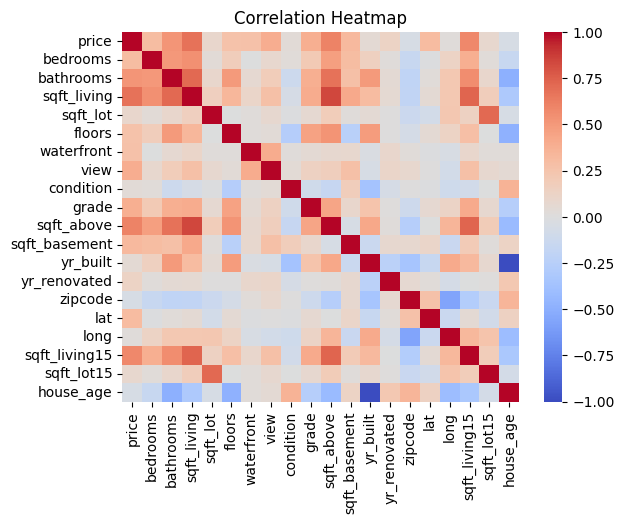

In [8]:
# calculate the correlation coefficients
corr = df.corr()

# plot the heatmap
# sns.set(font_scale=0.5) annot=True
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

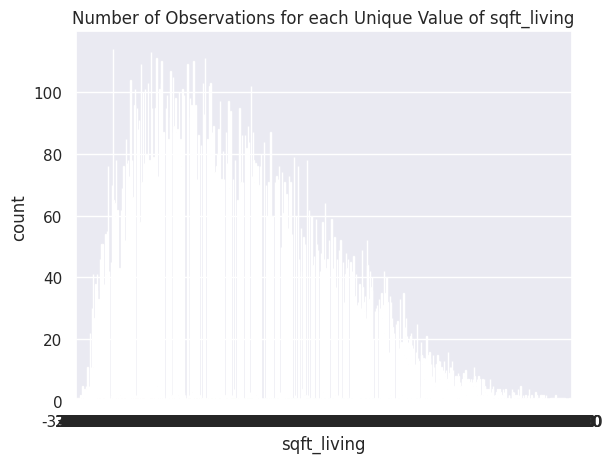

In [9]:
# plot the countplot for selected features
sns.set(font_scale=1)
sns.countplot(x='sqft_living', data=df)
plt.title('Number of Observations for each Unique Value of sqft_living')
plt.show()

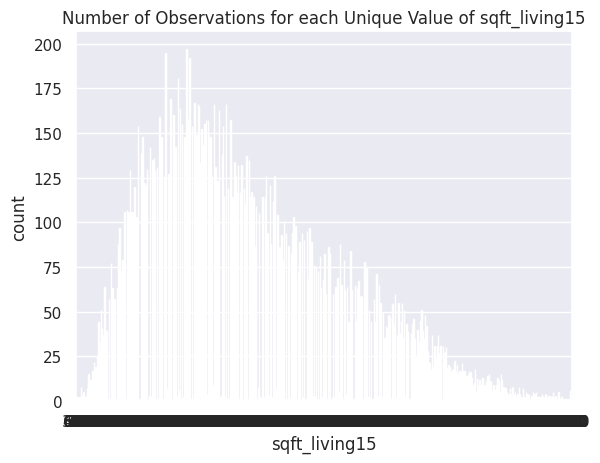

In [10]:
sns.set(font_scale=1)
sns.countplot(x='sqft_living15', data=df)
plt.title('Number of Observations for each Unique Value of sqft_living15')
plt.show()

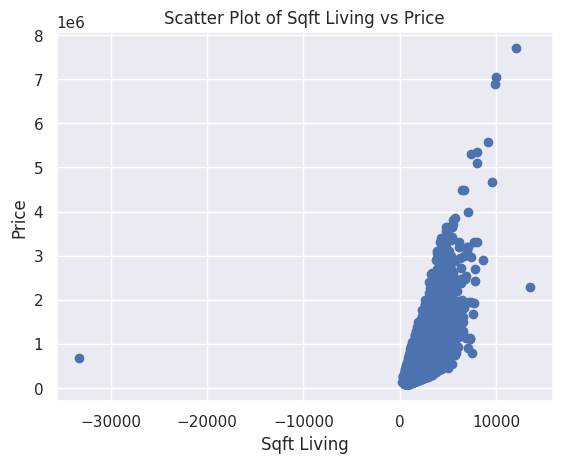

In [11]:
# plot the scatter plot for selected features
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Scatter Plot of Sqft Living vs Price')
plt.show()

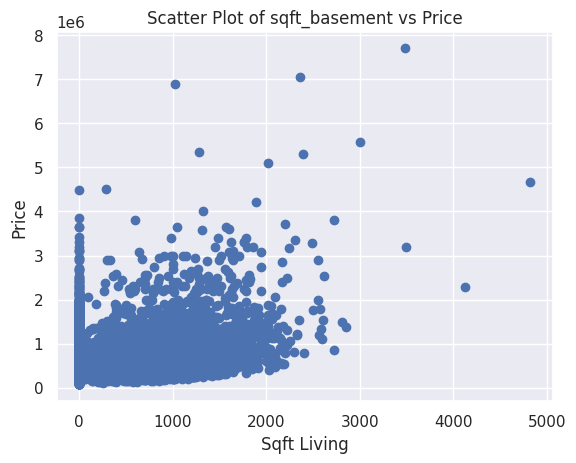

In [12]:
plt.scatter(df['sqft_basement'], df['price'])
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Scatter Plot of sqft_basement vs Price')
plt.show()

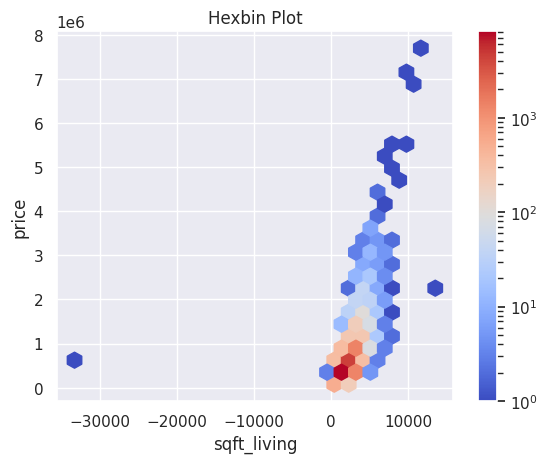

In [13]:
# plot the hexbin plot for selected features
plt.hexbin(df['sqft_living'], df['price'], gridsize=25, cmap='coolwarm', bins='log', mincnt=1)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Hexbin Plot')
plt.colorbar()
plt.show()


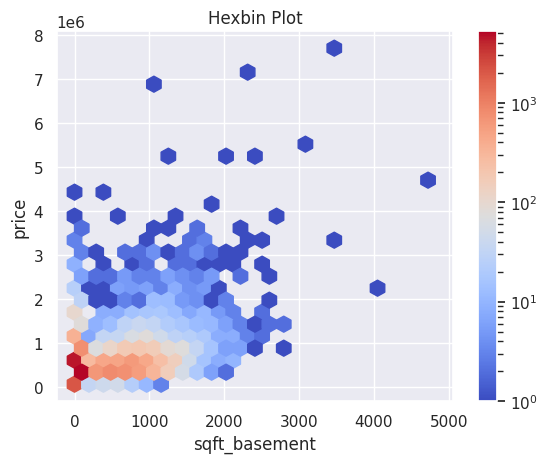

In [14]:
plt.hexbin(df['sqft_basement'], df['price'], gridsize=25, cmap='coolwarm', bins='log', mincnt=1)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('Hexbin Plot')
plt.colorbar()
plt.show()


6) Plotting Histogram for Features in Dataset

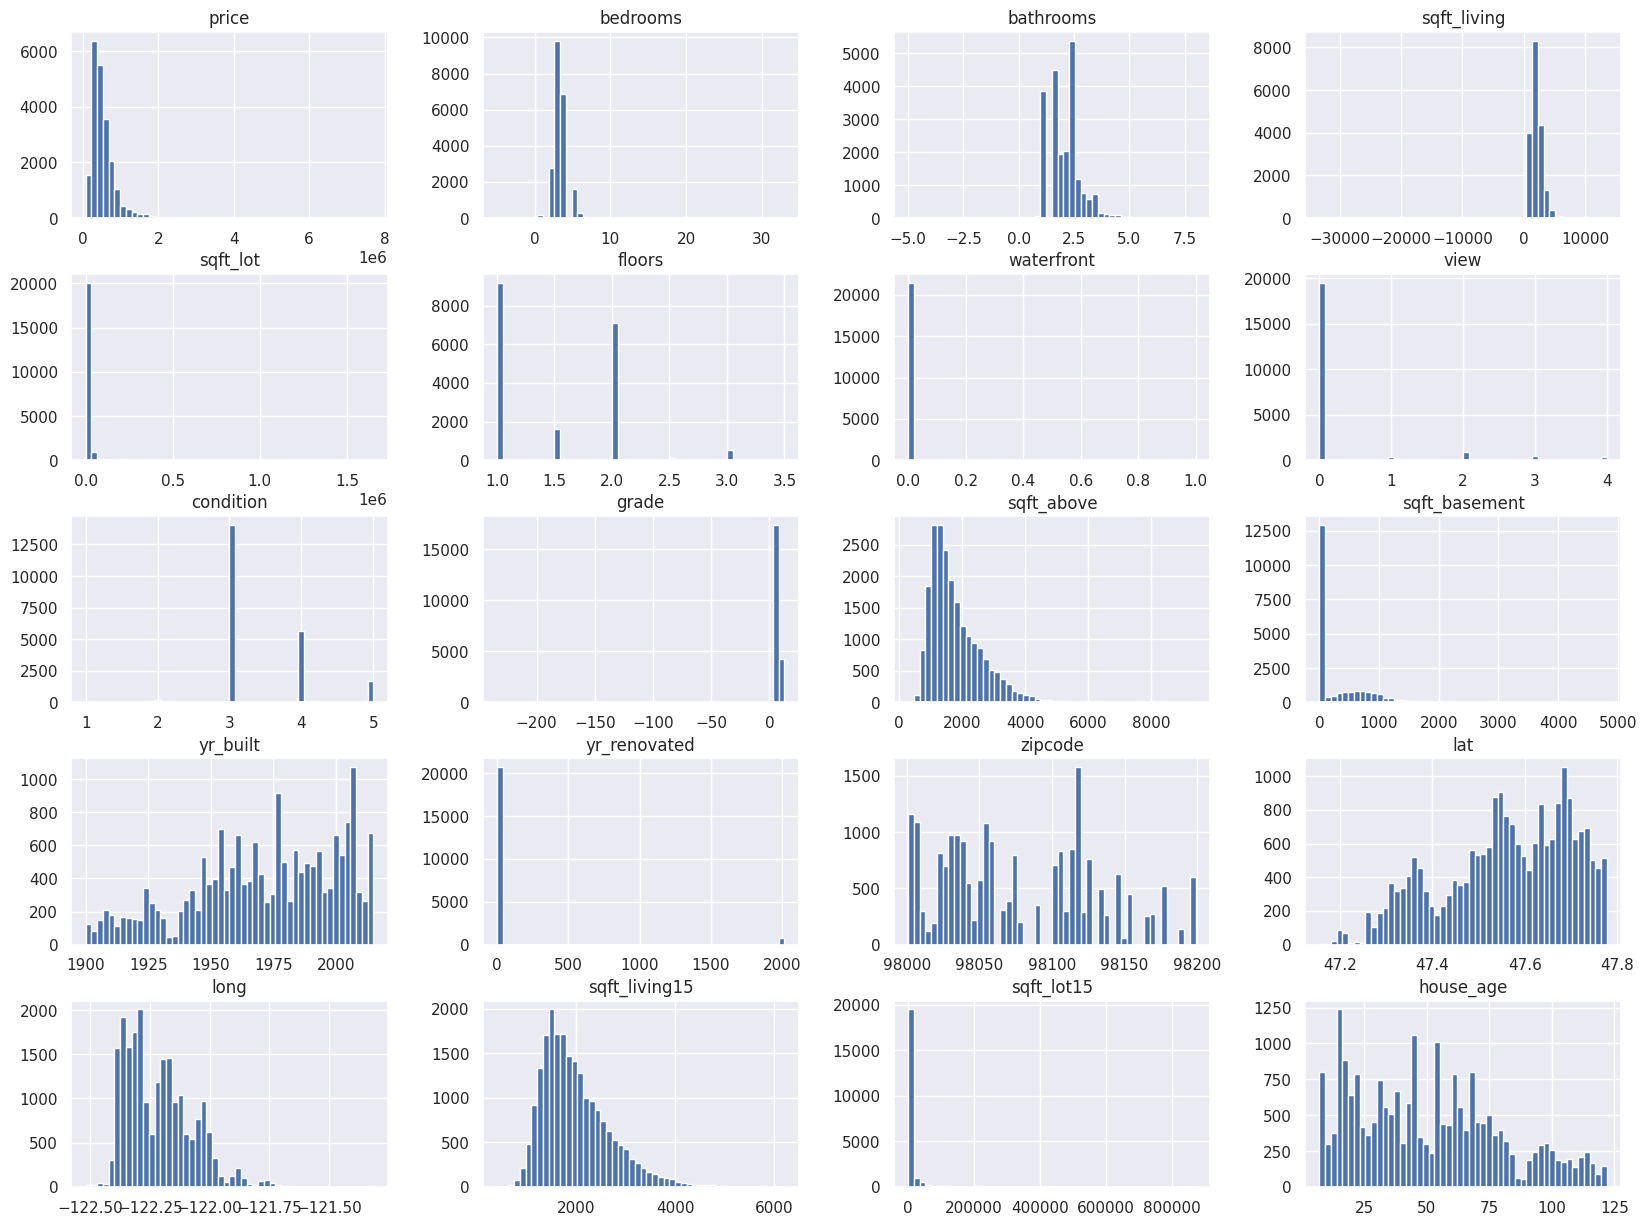

In [15]:
# plot histograms for all features
df.hist(bins=50, figsize=(20, 15))
plt.show()

# $\color{green}{\text{Preprocessing}}$

1) When dealing with missing data, there are two main methods for solving the problem:
Dealing with missing values is an important step in data preprocessing and analysis. Here are several common approaches to handle missing values:

* Deleting rows or columns: If the missing values are few and randomly distributed, you can simply delete the rows or columns containing missing values. However, this approach should be used with caution, as it may result in loss of valuable information.

* Imputation: Imputation involves filling in the missing values with estimated or predicted values. Some commonly used imputation techniques include:

 - Mean, median, or mode imputation: Replace missing values with the mean, median, or mode of the available values in the same column.
 - Forward fill or backward fill: Replace missing values with the previous or next known value in the same column, respectively.
 - Regression imputation: Use regression models to predict missing values based on other variables.
 - K-nearest neighbors (KNN) imputation: Replace missing values with the average of the K-nearest neighbors in the feature space.
* Indicator variable: Create an additional binary variable to indicate whether a value is missing or not. This allows the missingness to be captured as a feature during analysis.

* Subsetting: If the missingness is related to a specific variable, you can subset the data based on that variable to analyze the missing values separately.

* Domain-specific knowledge: Utilize domain knowledge or expert input to make informed decisions about handling missing values. This can involve specific rules or assumptions based on the context of the data.

It is important to consider the nature of the missingness and the specific requirements of your analysis when choosing an appropriate method for dealing with missing values.

2) Based on the results of the previous phase, the "sqft_living" feature had the highest amount of missing data. To solve the missing data problem for all features, we can use imputation techniques such as filling missing values with the mean or mode of the available data.

3) Normalization or standardization of numerical features is performed to scale the features to a similar range and prevent features with larger values from dominating the model. Normalization scales the data between 0 and 1, while standardization scales the data to have a mean of 0 and a standard deviation of 1. In this project, it may not be necessary to perform normalization or standardization since the features are already on a similar scale.

4) Preprocessing techniques for categorical features include label encoding, one-hot encoding, and feature hashing. Label encoding assigns a numerical value to each category, while one-hot encoding creates binary variables for each category. Feature hashing maps each category to a small number of hash values. Not all categorical data requires these methods; it depends on the nature of the data and the requirements of the model.

5) Yes, it is possible to remove some columns if they are irrelevant or redundant to the analysis. However, removing too many columns can result in loss of information and may negatively affect the performance of the model.

6) The ratio of the test and train data depends on the size of the dataset and the nature of the problem. Typically, a 70:30 or 80:20 split is used for train and test data, respectively. There are several methods for dividing and creating these two categories, such as random sampling and stratified sampling. Random sampling involves randomly selecting data points for the train and test data, while stratified sampling involves selecting data points to ensure that the train and test data have similar distributions of a particular feature.

7) The validation category is used to evaluate the performance of the model on unseen data and to tune the hyperparameters of the model. The data is split into three categories: train, validation, and test. The training data is used to train the model, the validation data is used to tune the hyperparameters, and the test data is used to evaluate the performance of the model. This method helps to prevent overfitting and to improve the generalization of the model.

Based on the results of the previous phase, the "sqft_living", "floors", "sqft_basement", and "yr_built" features have the highest amount of missing data. To solve the missing data problem, we can use different methods such as mean imputation, median imputation, mode imputation, and so on. Here, we can use mean imputation to replace missing values with the mean value of each feature:

In [16]:
df['sqft_living'].fillna(df['sqft_living'].mean(), inplace=True)
df['floors'].fillna(df['floors'].mean(), inplace=True)
df['sqft_basement'].fillna(df['sqft_basement'].mean(), inplace=True)
df['yr_built'].fillna(df['yr_built'].mean(), inplace=True)

Normalization or standardization is performed on numerical features to scale the values to a similar range and make it easier for the model to learn. In this project, it is necessary to perform normalization or standardization on the "price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", and "sqft_lot15" features to improve the model's performance. Here, we can use StandardScaler from scikit-learn to standardize the numerical features:

In [17]:
scaler = StandardScaler()
num_features = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']
df[num_features] = scaler.fit_transform(df[num_features])

For using categorical features in model training, some useful preprocessing techniques are available such as one-hot encoding, label encoding, binary encoding, and so on. Not all categorical data require these methods, for example, if the categorical feature is ordinal, we can use label encoding. In this project, the "location" and "style" features can be one-hot encoded using pandas' get_dummies method:

In [18]:
cat_features = ['location', 'style']
df = pd.get_dummies(df, columns=cat_features)

 It is possible to remove some columns if they are not useful for the model or if they cause the curse of dimensionality. In this project, we can remove the "Unnamed: 0.2", "Unnamed: 0.1", "Unnamed: 0", "id", "date", "zipcode", "lat", and "long" columns:

In [19]:
df.drop(columns=['date', 'lat', 'long'], inplace=True)

To train and evaluate our machine learning model, we need to split the data into two categories of test and train. The ratio of this division can be different based on the size of the dataset and the complexity of the model. In this project, we can use an 80-20 split, which means 80% of the data is used for training the model, and 20% is used for testing the model. We can use the train_test_split method from scikit-learn to split the data:

In [20]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# $\color{green}{\text{Linear Regression}}$

1) The formula for calculating alpha and beta for a first-degree regression model is based on the method of least squares. The objective of this method is to minimize the sum of the squares of the differences between the observed and predicted values. Alpha represents the y-intercept of the regression line, and beta represents the slope of the line. In other words, alpha is the predicted value of y when x is equal to zero, and beta is the change in y for a unit change in x. The values of alpha and beta are obtained by minimizing the sum of the squares of the residuals, which is the difference between the observed and predicted values.

2) It is not possible to determine which feature gives a more accurate output without analyzing the data and the correlation between the features and the target variable. Generally, the feature that has the highest correlation **(sqft_living)** with the target variable **(Price)** is the most informative one. Therefore, before selecting a feature, it is important to perform exploratory data analysis and correlation analysis to determine which feature has the strongest relationship with the target variable.

3)
* **RSS (Residual Sum of Squares)** is the sum of the squares of the residuals, which is the difference between the observed and predicted values. This measure is used to evaluate the goodness of fit of a regression model.
* **MSE (Mean Squared Error)** is the average of the squared differences between the observed and predicted values. This measure is used to evaluate the accuracy of a regression model.
* **RMSE (Root Mean Squared Error)** is the square root of the MSE. This measure is used to evaluate the accuracy of a regression model and is expressed in the same units as the target variable.
* **R2 score** is the coefficient of determination, which measures the proportion of the variance in the target variable that is explained by the independent variables in the model. This measure ranges from 0 to 1, where 0 indicates that the model does not explain any of the variance, and 1 indicates that the model explains all of the variance.

4) After evaluating the predicted values using **RMSE** and **R2 score** methods, we can compare the results for different features. The feature with the lowest RMSE and highest R2 score is considered the most accurate predictor. Based on the results, we can draw conclusions about the performance of the model for different features. It is important to note that the results of the evaluation depend on the quality of the data and the assumptions of the regression model. Therefore, it is recommended to perform sensitivity analysis and cross-validation to verify the robustness of the results.

Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

here we want to find the intercept($\alpha$) and slope($\beta$) by minimizing the derivation of the RSS function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in term of $\underline{\alpha}$ and $\underline{\beta}$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$



Based on the formula above, complete this function to compute the parameters of a simple linear regression

In [21]:
def simple_linear_regression(input_feature, output):
    # Compute the sum of input_feature and output
    input_sum = input_feature.sum()
    output_sum = output.sum()
    
    # Compute the product of the output and the input_feature and its sum
    product = (input_feature * output).sum()
    
    # Compute the squared value of the input_feature and its sum
    square_sum = (input_feature ** 2).sum()
    
    # Use the formula for the slope
    n = len(input_feature)
    slope = (product - (input_sum * output_sum) / n) / (square_sum - (input_sum ** 2) / n)
    
    # Use the formula for the intercept
    intercept = output.mean() - slope * input_feature.mean()
    
    return (intercept, slope)

Now complete this function to predict the value of given data based on the calculated intercept and slope

In [22]:
def get_regression_predictions(input_feature, intercept, slope):
    # Calculate the predicted values
    predicted_values = intercept + slope * input_feature
    return predicted_values

Now that we have a model and can make predictions let's evaluate our model using Root Mean Square Error (RSME). RMSE is the square root of the mean of the squared differences between the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [23]:
def get_root_mean_square_error(predicted_values, output):
    # Compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = predicted_values - output
    
    # Square the residuals and add them up
    squared_residuals_sum = (residuals ** 2).sum()
    
    # Find the mean of the above phrase
    mean_squared_residuals = squared_residuals_sum / len(predicted_values)
    
    # Calculate the root
    RMSE = mean_squared_residuals ** 0.5
    
    return RMSE

AS you might guessed, the RMSE has no bound and it is not easy to find out the percentage of fitting the model into data with it. instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. Matematically, the R2 score formula is shown as follows:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In this step, complete the following function to calculate the R2 score of a given input_feature, output, intercept, and slope:

In [24]:
def get_r2_score(predicted_values, output):
    # compute the mean of the output variable
    output_mean = np.mean(output)

    # compute the residuals
    residuals = predicted_values - output

    # compute the sum of squares of the residuals
    ss_res = np.sum(residuals**2)

    # compute the sum of squares total
    ss_tot = np.sum((output - output_mean)**2)

    # compute the R-squared score
    r2_score = 1 - (ss_res / ss_tot)

    return r2_score


4) Now calculate the fitness of the model and explain the outputs

In [25]:
# Fit a simple linear regression model
designated_feature_list = ['bathrooms', 'sqft_living' , 'yr_built' , 'grade' , 'zipcode']

for feature in designated_feature_list:
    input_feature = X_train[feature]
    output = y_train
    intercept, slope = simple_linear_regression(input_feature, output)

    # Make predictions on the test set
    test_predictions = get_regression_predictions(X_test[feature], intercept, slope)

    # Evaluate the model using RMSE and R2 score
    RMSE = get_root_mean_square_error(test_predictions, y_test)
    R2 = get_r2_score(test_predictions, y_test)

    print('*** Feature:', feature)
    print('RMSE:', RMSE)
    print('R2 score:', R2)
    print('\n')


*** Feature: bathrooms
RMSE: 0.9126361461391385
R2 score: 0.25737712079292185


*** Feature: sqft_living
RMSE: 0.8132278598671053
R2 score: 0.41034567158995483


*** Feature: yr_built
RMSE: 1.0576993718935483
R2 score: 0.0025354106866073423


*** Feature: grade
RMSE: 0.939290422961088
R2 score: 0.21336587517532968


*** Feature: zipcode
RMSE: 1.0581314994444095
R2 score: 0.0017202074417804747




# $\color{green}{\text{Classification}}$

In [26]:
median_price = np.median(y_train)

level_price_encoded_train = np.where(y_train > median_price, 1, 0)
level_price_encoded_test = np.where(y_test > median_price, 1, 0)

In the confusion matrix provided:

- The top-left value, 1768, represents the number of instances that were correctly predicted as the first class (often referred to as the true negatives).
- The top-right value, 368, represents the number of instances that were predicted as the first class but actually belong to the second class (false positives).
- The bottom-left value, 368, represents the number of instances that were predicted as the second class but actually belong to the first class (false negatives).
- The bottom-right value, 1819, represents the number of instances that were correctly predicted as the second class (true positives).

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier()

# Create the GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(np.array(X_train), level_price_encoded_train)

# Print the best parameters and the corresponding mean cross-validated score
print("Best Parameters for Decision Tree Classifier \n", grid_search.best_params_)


Best Parameters for Decision Tree Classifier 
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [28]:
dt = DecisionTreeClassifier(**grid_search.best_params_)
dt.fit(np.array(X_train), level_price_encoded_train)
y_pred_dt = dt.predict(np.array(X_test))

conf_mat = confusion_matrix(level_price_encoded_test, y_pred_dt)

acc = (conf_mat[0][0]+conf_mat[1][1]) / sum(sum(conf_mat))

print('Confusion Matrix:\n' , conf_mat, '\n')
print('Test Accuracy:', round(acc*100, 2), '%')

Confusion Matrix:
 [[1816  320]
 [ 374 1813]] 

Test Accuracy: 83.95 %


## KNeighbors Classifier

In [29]:
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
}

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid_search.fit(np.array(X_train), level_price_encoded_train)
knn_best_params = knn_grid_search.best_params_

print('Best Parameters for KNeighbors Classifier \n', knn_best_params)

Best Parameters for KNeighbors Classifier 
 {'n_neighbors': 5}


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(np.array(X_train), level_price_encoded_train)
y_pred_knn = knn.predict(np.array(X_test))

conf_mat = confusion_matrix(level_price_encoded_test, y_pred_knn)

acc = (conf_mat[0][0]+conf_mat[1][1]) / sum(sum(conf_mat))

print('Confusion Matrix:\n' , conf_mat, '\n')
print('Test Accuracy:', round(acc*100, 2), '%')

Confusion Matrix:
 [[1870  266]
 [ 381 1806]] 

Test Accuracy: 85.03 %


## Logistic Regression

In [31]:
lr = LogisticRegression()

lr_param_grid = {
    'C': [0.001, 0.1, 10, 100],
    'penalty': ['l1', 'l2']
}

simplefilter(action='ignore')

lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5)
lr_grid_search.fit(np.array(X_train), level_price_encoded_train)
lr_best_params = lr_grid_search.best_params_
print('Best Parameters for Logistic Regression \n', lr_best_params)

Best Parameters for Logistic Regression 
 {'C': 0.1, 'penalty': 'l2'}


In [32]:
lr = LogisticRegression(C=0.1, penalty='l2', random_state=32)
lr.fit(np.array(X_train), level_price_encoded_train)
y_pred_lr = lr.predict(np.array(X_test))

conf_mat = confusion_matrix(level_price_encoded_test, y_pred_lr)

acc = (conf_mat[0][0]+conf_mat[1][1]) / sum(sum(conf_mat))

print('Confusion Matrix:\n' , conf_mat, '\n')
print('Test Accuracy:', round(acc*100, 2), '%')

Confusion Matrix:
 [[1732  404]
 [ 542 1645]] 

Test Accuracy: 78.12 %


## Decision Tree Classifier

In [33]:
# Decision Tree with GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)

dtc_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtc_gs = GridSearchCV(dtc, dtc_params, cv=5)
dtc_gs.fit(np.array(X_train), level_price_encoded_train)
dtc_gs_best_params = dtc_gs.best_params_

print('Best Parameters for Decision Tree Classifier \n', dtc_gs_best_params)


Best Parameters for Decision Tree Classifier 
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [34]:
dtc_gs_pred = dtc_gs.predict(np.array(X_test))
dtc_gs_acc = np.mean(dtc_gs_pred == level_price_encoded_test)
dtc_gs_cm = confusion_matrix(level_price_encoded_test, dtc_gs_pred)

acc = (dtc_gs_cm[0][0]+dtc_gs_cm[1][1]) / sum(sum(dtc_gs_cm))

print('Confusion Matrix:\n' , conf_mat, '\n')
print('Test Accuracy:', round(acc*100, 2), '%')

Confusion Matrix:
 [[1732  404]
 [ 542 1645]] 

Test Accuracy: 84.11 %


Underfitting and overfitting are two common problems in machine learning models that can occur during the training phase. These issues arise when a model fails to generalize well to new, unseen data.

1. Underfitting:

* Underfitting occurs when a model is too simple and fails to capture the underlying patterns in the data.
* Signs of underfitting include poor performance on both the training and test datasets, with high bias and low variance.
* Reasons for underfitting:
 - Insufficient model complexity: The model may not have enough capacity to capture the complexity of the data.
 - Limited training data: If the training dataset is small or unrepresentative of the true population, the model may not learn enough to generalize well.
 - Over-regularization: Excessive regularization techniques, such as strong penalties or constraints, can limit the model's ability to learn from the data.
2. Overfitting:

* Overfitting occurs when a model becomes too complex and starts to memorize the training data, including noise or random fluctuations.
* Signs of overfitting include excellent performance on the training dataset but poor performance on the test dataset, with low bias and high variance.
* Reasons for overfitting:
 - Excessive model complexity: The model may have too many parameters or be too flexible, allowing it to fit the training data too closely.
 - Insufficient regularization: Inadequate regularization techniques, such as weak penalties or constraints, fail to prevent the model from fitting noise in the data.
 - Limited training data: When the training dataset is small, complex models can easily overfit by memorizing specific examples instead of learning general patterns.

To address underfitting and overfitting, various techniques can be employed:

* Underfitting remedies:
 - Increase model complexity: Use a more complex model with more parameters or features to capture additional patterns in the data.
 - Gather more training data: Collecting more diverse and representative data can provide the model with more information to learn from.
 - Reduce regularization: Adjust the regularization techniques, such as decreasing the strength of penalties or constraints, to allow the model to fit the data more closely.
* Overfitting remedies:
 - Simplify the model: Use a less complex model or reduce the number of features to prevent the model from fitting noise in the data.
 - Increase regularization: Apply stronger regularization techniques, such as increasing the penalties or constraints, to restrict the model's flexibility.
 - Cross-validation: Use techniques like cross-validation to evaluate the model's performance on multiple subsets of the data and detect overfitting.

Balancing the model complexity, the amount and quality of data, and the regularization techniques is crucial for avoiding both underfitting and overfitting, and achieving a well-generalized model.

# $\color{green}{\text{Ensemble Learning}}$

## Random Forest Classifier

The first section of the code varies the number of trees (n_estimators) and (max_depth) of the Random Forest Classifier model separately to evaluate their impact on test accuracy. It uses the RandomForestClassifier from the scikit-learn library and fits the model to the training data (X_train and level_price_encoded_train) using different values of n_estimators and max_depth. The predicted values for the test data (X_test) are then compared to the actual values (level_price_encoded_test) using the accuracy_score function from the scikit-learn library. The accuracy scores are stored in the test_accs list for each value of n_estimators and max_depth. Finally, a line plot is created to visualize the relationship between the number of trees or max depth and the test accuracy.

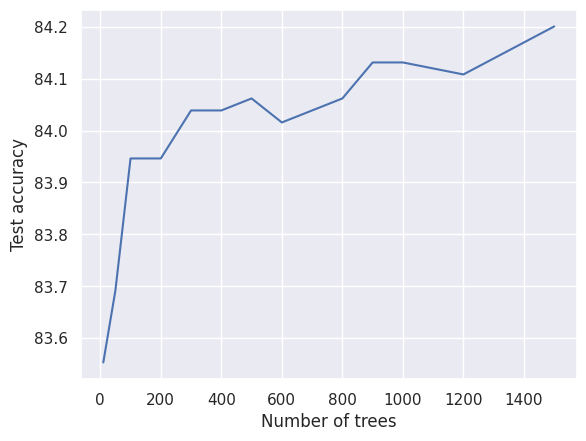

In [35]:
# Vary n_estimators
n_trees = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1500]
test_accs = []
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, max_depth=10, random_state=42)
    rf.fit(np.array(X_train), level_price_encoded_train)
    y_test_pred = rf.predict(np.array(X_test))
    test_accs.append(accuracy_score(level_price_encoded_test, y_test_pred)*100)

plt.plot(n_trees, test_accs)
plt.xlabel('Number of trees')
plt.ylabel('Test accuracy')
plt.show()


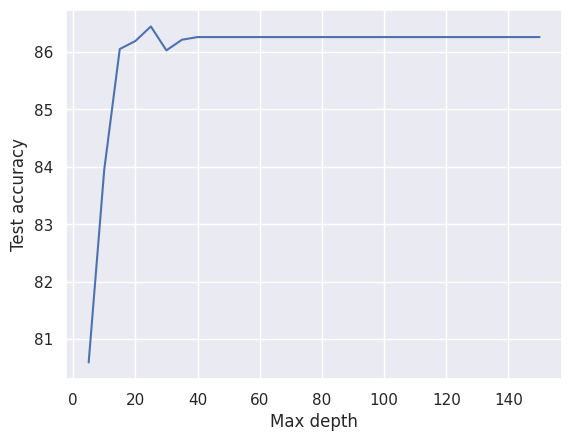

In [36]:
# Vary max_depth
depths = [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 80, 100, 120, 150]
test_accs = []
for d in depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42)
    rf.fit(np.array(X_train), level_price_encoded_train)
    y_test_pred = rf.predict(np.array(X_test))
    test_accs.append(accuracy_score(level_price_encoded_test, y_test_pred)*100)

plt.plot(depths, test_accs)
plt.xlabel('Max depth')
plt.ylabel('Test accuracy')
plt.show()


This section of the code compares the learning curves of the Decision Tree and Random Forest models using the learning_curve function from the scikit-learn library. It fits both models to the training data for different training set sizes (train_sizes) and evaluates the model performance using cross-validation (cv=5). The training and validation accuracy scores for both models are calculated and stored in separate lists (dt_train_scores, dt_valid_scores, rf_train_scores, rf_valid_scores). Finally, a line plot is created to visualize the learning curves of both models for different training set sizes.

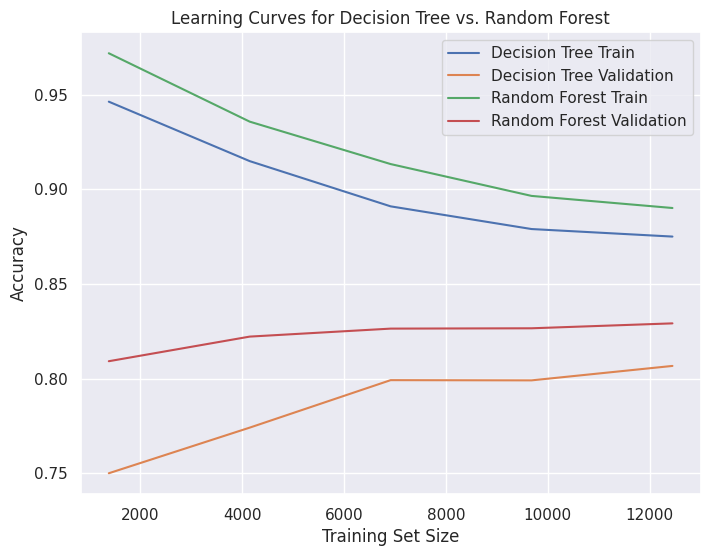

In [37]:
# Decision Tree model
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
train_sizes, dt_train_scores, dt_valid_scores = learning_curve(
    dt, np.array(X_train), level_price_encoded_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
train_sizes, rf_train_scores, rf_valid_scores = learning_curve(
    rf, np.array(X_train), level_price_encoded_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, dt_train_scores.mean(axis=1), label='Decision Tree Train')
plt.plot(train_sizes, dt_valid_scores.mean(axis=1), label='Decision Tree Validation')
plt.plot(train_sizes, rf_train_scores.mean(axis=1), label='Random Forest Train')
plt.plot(train_sizes, rf_valid_scores.mean(axis=1), label='Random Forest Validation')
plt.title('Learning Curves for Decision Tree vs. Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Bias and variance are two important concepts in machine learning that are closely related to model performance and generalization.

* Bias: Bias refers to the difference between the expected (or average) prediction of a model and the true value of the target variable. In other words, it measures how much the model's predictions deviate from the actual values on average, across different datasets.

* Variance: Variance refers to the variability of model predictions for different datasets, given the same input features. In other words, it measures how sensitive the model's predictions are to small variations in the training data.
In general, a model with high bias underfits the data, meaning it is too simplistic and unable to capture the underlying patterns in the data. On the other hand, a model with high variance overfits the data, meaning it is too complex and captures noise or random fluctuations in the data.

The relationship between bias and variance can be represented by the bias-variance tradeoff, which states that as the complexity of the model increases, the bias decreases while the variance increases, and vice versa. The goal is to find the optimal balance between bias and variance that minimizes the overall error of the model.

Regarding the decision of using a decision tree model or a random forest model, it depends on the dataset and the problem at hand. Decision tree models have low bias but high variance, meaning they are prone to overfitting the training data. Random forest models, on the other hand, use an ensemble of decision trees and incorporate techniques such as bootstrapping and feature bagging to reduce variance and overfitting.

If the dataset is small or the problem is simple, a decision tree model with low complexity may perform better. However, if the dataset is large or the problem is complex, a random forest model that can handle more data and incorporate multiple decision trees to reduce variance and improve generalization may perform better. It's important to experiment with different models and techniques and evaluate their performance on the specific problem to determine the optimal approach.

# $\color{green}{\text{Gradient Boosting}}$

The main difference between a boosting tree and a decision tree lies in their learning approach and the way they combine multiple weak learners to form a strong predictive model. Here's an overview of the two:

Decision Tree:

A decision tree is a non-linear supervised learning algorithm that uses a hierarchical structure to make decisions or predictions.
It recursively splits the input features based on certain conditions to create a tree-like structure of decision nodes and leaf nodes.
Each decision node represents a feature and a condition, while each leaf node represents a predicted outcome.
Decision trees can handle both regression and classification tasks and are known for their interpretability and ability to capture complex interactions.
However, they are prone to overfitting, especially when the tree becomes deep and complex.

Boosting Tree:

Boosting is an ensemble learning technique that combines multiple weak learners (often decision trees) to create a strong learner.
Boosting algorithms iteratively build the weak learners, where each subsequent learner focuses on correcting the mistakes made by the previous ones.
Boosting algorithms assign weights to training instances, emphasizing the misclassified ones in subsequent iterations.
The final prediction is made by aggregating the predictions of all weak learners, usually through weighted voting or averaging.
Boosting algorithms, such as AdaBoost, Gradient Boosting, and XGBoost, improve model performance by reducing bias and variance and achieving high accuracy.

XGBoost (Extreme Gradient Boosting):

XGBoost is a highly optimized implementation of the gradient boosting algorithm.
It uses a combination of boosting and regularization techniques to improve model performance and prevent overfitting.
XGBoost utilizes gradient descent optimization to minimize a loss function and update the weights of the weak learners.
It incorporates advanced features like parallel processing, tree pruning, column subsampling, and regularization to enhance model efficiency and generalization.
XGBoost has gained popularity due to its scalability, speed, and ability to handle large datasets.
It is widely used in various domains, including Kaggle competitions and real-world applications.
In summary, while decision trees are standalone models that create a tree-like structure to make predictions, boosting trees, like XGBoost, combine multiple decision trees iteratively to improve predictive accuracy, reduce bias and variance, and handle complex tasks effectively.

In [38]:
# define the XGBRegressor model
xgb_model = XGBRegressor()

# set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform grid search cross validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(np.array(X_train), level_price_encoded_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...in=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [39]:
# print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# make predictions on test set using best model
y_test_pred = grid_search.predict(np.array(X_test))

# Apply threshold
threshold = 0.5
y_test_pred = np.where(y_test_pred > threshold, 1, 0)

# evaluate the model using metrics
print("Accuracy:", round(accuracy_score(level_price_encoded_test, y_test_pred)*100, 2), '%')
print("Mean Absolute Error:", mean_absolute_error(level_price_encoded_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(level_price_encoded_test, y_test_pred))
print("R-squared Score:", r2_score(level_price_encoded_test, y_test_pred))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 90.63 %
Mean Absolute Error: 0.0936849410131853
Mean Squared Error: 0.0936849410131853
R-squared Score: 0.6252080732417811
